---

# Decision and Regression Trees

# Decision Trees-1

## Introduction

A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.
Decision trees are commonly used in operations research, specifically in decision analysis, to help identify a strategy most likely to reach a goal, but are also a popular tool in machine learning.

## Illustration

A decision tree is a flowchart-like structure in which each internal node represents a "test" on an attribute (e.g. whether a coin flip comes up heads or tails), each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes). The paths from root to leaf represent classification rules.


<p align="center">
    <img src="tree1.png" width="700">
</p>

- Root Nodes – It is the node present at the beginning of a decision tree from this node the population starts dividing according to various features.
* Decision Nodes – the nodes we get after splitting the root nodes are called Decision Node
* Leaf Nodes – the nodes where further splitting is not possible are called leaf nodes or terminal nodes
* Sub-tree – just like a small portion of a graph is called sub-graph similarly a sub-section of this decision tree is called sub-tree.
* Pruning – is nothing but cutting down some nodes to stop overfitting.

## Advantages and Disadvantages

1. Advantages of decision trees:

* Are simple to understand and interpret. People are able to understand decision tree models after a brief explanation.
* Have value even with little hard data. Important insights can be generated based on experts describing a situation (its alternatives, probabilities, and costs) and their preferences for outcomes.
* Help determine worst, best, and expected values for different scenarios.
* Use a white box model. If a given result is provided by a model.
* Can be combined with other decision techniques.
* The action of more than one decision-maker can be considered.

2. Disadvantages of decision trees:

* They are unstable, meaning that a small change in the data can lead to a large change in the structure of the optimal decision tree.
* They are often relatively inaccurate. Many other predictors perform better with similar data. This can be remedied by replacing a single decision tree with a random forest of decision trees, but a random forest is not as easy to interpret as a single decision tree.
* For data including categorical variables with different numbers of levels, information gain in decision trees is biased in favor of those attributes with more levels.
* Calculations can get very complex, particularly if many values are uncertain and/or if many outcomes are linked.


---

---

# Regression Trees-2

## Introduction
A regression tree is basically a decision tree that is used for the task of regression which can be used to predict continuous valued outputs instead of discrete outputs.

## Algorithm

### Mean Square Error

In Decision Trees for Classification, we saw how the tree asks right questions at the right node in order to give accurate and efficient classifications. The way this is done in Classification Trees is by using 2 measures , namely Entropy and Information Gain. But since we are predicting continuous variables, we cannot calculate the entropy and go through the same process. We need a different measure now. A measure that tells us how much our predictions deviate from the original target and that’s the entry-point of mean square error.

<p align="center">
    <img src="mse.png" width="200">
</p>

### Steps:

> 1. Start with a single node containing all points. Calculate mc and S.
     S is the sum of squared errors for a tree T:
<p align="center">
    <img src="tree2.png" width="700">
</p> 

> where $V_c$ is the within-leave variance of leaf c. So we will make our splits so as to minimize S.

> 2. If all the points in the node have the same value for all the independent variables, stop. Otherwise, search over all binary splits of all variables for the one which will reduce S as much as possible. If the largest decrease in S would be less than some threshold δ, or one of the resulting nodes would contain less than q points, stop. Otherwise, take that split, creating two new nodes.

> 3. In each new node, go back to step 1.
---

## Dataset and Application-1

We will use the *iris* dataset loaded from *sklearn.datasets* to demonstrate this new technique. 
The Introduction of *iris* dataset is described in README.md

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import tree

In [6]:
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df[data.feature_names], df['target'], 
                                                    test_size = 0.4, 
                                                    random_state = 42)

In [10]:
decision_tree = DecisionTreeClassifier(max_depth=5, random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [11]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']

|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 5.35
|   |   |   |--- sepal length (cm) <= 4.95
|   |   |   |   |--- sepal width (cm) <= 2.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- sepal width (cm) >  2.45
|   |   |   |   |   |--- class: 2
|   |   |   |--- sepal length (cm) >  4.95
|   |   |   |   |--- sepal width (cm) <= 2.25
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- sepal width (cm) >  2.25
|   |   |   |   |   |--- class: 1
|   |   |--- petal length (cm) >  5.35
|   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal length (cm) <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- sepal length (cm) >  5.95
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2
 



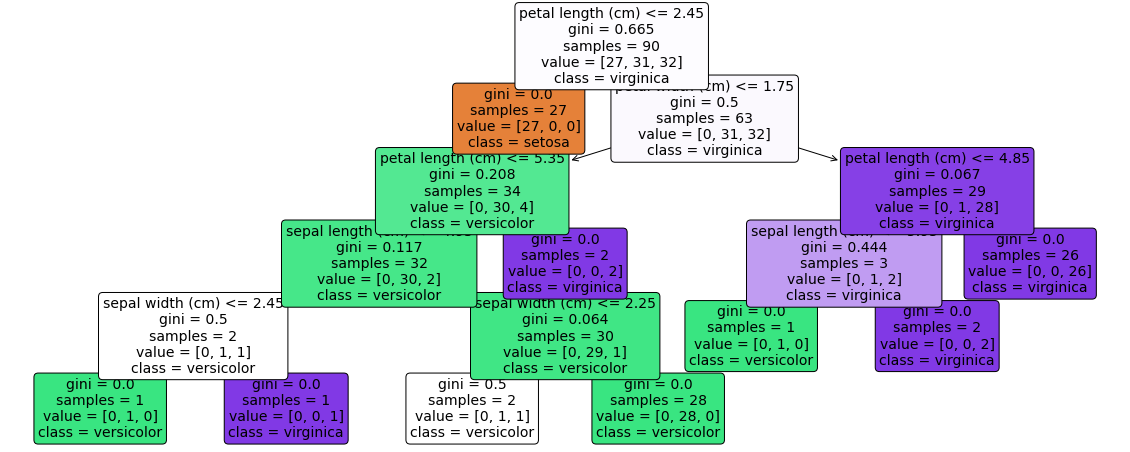

In [12]:
from sklearn.tree import plot_tree
from sklearn.tree import export_text

tree_rules = export_text(decision_tree,
                         feature_names = fn)
print(tree_rules, "\n")


plt.figure(figsize=(20, 8))
a = plot_tree(decision_tree,
                   feature_names = fn,
                   class_names = cn,
                   rounded = True,
                   filled = True, 
                   fontsize=14)
plt.show()

---
We next evaluate our models performance on the testing data using confusion matrix.

---

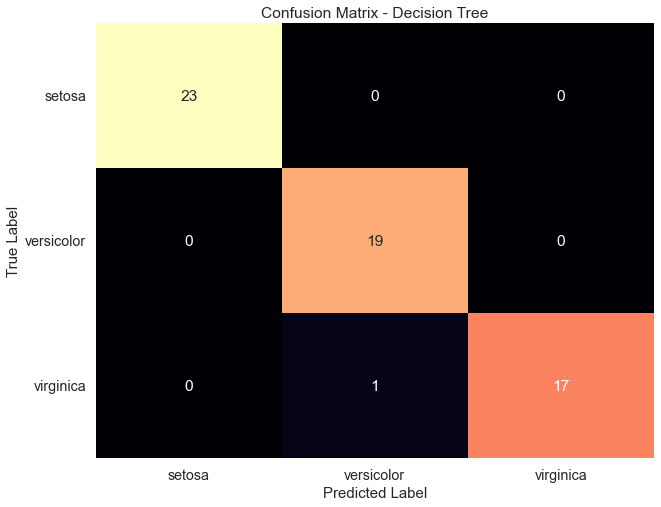

In [14]:
# predicted values on the testing data
test_pred_decision_tree = decision_tree.predict(X_test)

# Import metrics from sklearn 
from sklearn import metrics

# Note: visualizing your tree above will be weird after running seaborn
import seaborn as sns

# The confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, test_pred_decision_tree)

# Convert confusion matrix into dataframe
matrix_df = pd.DataFrame(confusion_matrix)


plt.figure(figsize=(10, 8))
ax = plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df,
            annot = True, 
            fmt = "g",
            ax = ax, 
            cmap = "magma", 
            cbar = False)

ax.set_title("Confusion Matrix - Decision Tree")
ax.set_xlabel("Predicted Label", fontsize=15)
ax.set_xticklabels(['setosa', 'versicolor', 'virginica'])
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(['setosa', 'versicolor', 'virginica'], rotation=0)
plt.show()

We can see from the confusion matrix that it is a very good result.

In [15]:
from sklearn.metrics import classification_report

y_pred = decision_tree.predict(X_test)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.95      1.00      0.97        19
           2       1.00      0.94      0.97        18

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



The accuracy is 0.98, very high.

## Dataset and Application-2

We will use the *wine*(Red Wine Quality) dataset loaded from kaggle.com to demonstrate this new technique. 
The Introduction of *wine* dataset is described in README.md

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

wine = pd.read_csv("/Users/rachelan/Rice University/Rice-INDE-577/Rice-INDE-577/Supervised Learning/Decision Tree/winequality-red.csv")
wine[0:]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [18]:
wine.drop_duplicates()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


<AxesSubplot:>

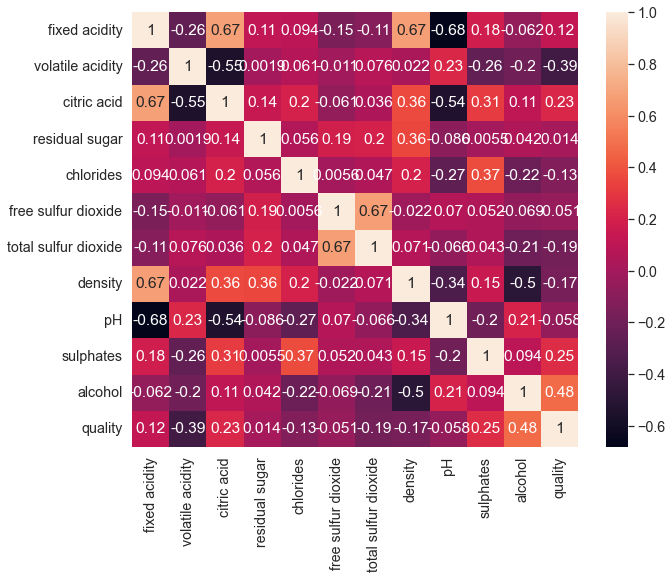

In [19]:
#Visualize the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(wine.corr(),annot=True)

In [20]:
X=wine.drop(["quality"],axis=1)
y=wine[["quality"]]

In [21]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 12)

reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [22]:
from sklearn.metrics import mean_squared_error

reg1 = DecisionTreeRegressor(max_depth=1, random_state = 12)
reg1.fit(X_train, y_train)
y_pred = reg1.predict(X_test)
print(f"MSE reg1: {mean_squared_error(y_test, y_pred)} \n")


reg2 = DecisionTreeRegressor(max_depth=20, random_state = 12)
reg2.fit(X_train, y_train)
y_pred = reg2.predict(X_test)
print(f"MSE reg2: {mean_squared_error(y_test, y_pred)} \n")


MSE reg1: 0.46237357445817506 

MSE reg2: 0.5279340277777778 



## Reference

Decision tree algorithm - A complete guide. Analytics Vidhya. (2021, August 31). Retrieved May 7, 2022, from https://www.analyticsvidhya.com/blog/2021/08/decision-tree-algorithm/ 

Prasad, A. (2021, August 8). Regression trees: Decision tree for regression: Machine Learning. Medium. Retrieved May 7, 2022, from https://medium.com/analytics-vidhya/regression-trees-decision-tree-for-regression-machine-learning-e4d7525d8047 

Principal components: Mathematics, example, interpretation. (n.d.). Retrieved May 7, 2022, from https://stat.cmu.edu/~cshalizi/350/lectures/10/lecture-10.pdf 

Wikimedia Foundation. (2022, April 15). Decision tree. Wikipedia. Retrieved May 7, 2022, from https://en.wikipedia.org/wiki/Decision_tree 